In [3]:
import pandas as pd
trans=pd.read_csv('~/Downloads/transaction_subset.csv')
trans

,Unnamed: 0,SKU,StoreID,Register,Transaction_Code,Sequence,Date,InterID,Stype,Quantity,Original_Price,AMT,MIC
0,93248685,2477607,2307,860,6300,0,2005-07-02,P,1,80.0,53.60,958900058,45
1,55346863,9243610,1103,110,1500,17609052,2005-07-01,P,1,49.5,12.38,100100021,542
2,110850552,3844099,4907,350,4600,0,2004-08-13,P,1,14.5,14.50,44300070,281
3,61115855,9693111,8407,730,500,0,2004-11-21,P,1,28.0,28.00,611200015,690
4,27109600,6746773,2203,730,3500,521204390,2005-07-13,P,1,48.0,5.99,699100021,543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,18702039,6057713,2104,140,2300,0,2004-10-13,P,1,19.5,19.50,119300054,293
9999996,14133844,5650750,7904,630,2300,0,2005-08-04,P,1,NaN,0.00,193700090,281
9999997,40413047,7936541,9304,441,500,0,2005-01-23,R,1,35.0,35.00,217500039,327
9999998,2865177,4746413,5403,350,2800,846607391,2004-11-10,P,1,19.5,19.50,387700047,281


In [3]:
seasonality=trans[['Date','AMT']]
seasonality

,Date,AMT
0,2005-07-02,958900058
1,2005-07-01,100100021
2,2004-08-13,44300070
3,2004-11-21,611200015
4,2005-07-13,699100021
...,...,...
9999995,2004-10-13,119300054
9999996,2005-08-04,193700090
9999997,2005-01-23,217500039
9999998,2004-11-10,387700047


In [4]:
import matplotlib.pyplot as plt

# Assuming 'seasonality' is your DataFrame

# Convert the 'Date' column to datetime
seasonality['Date'] = pd.to_datetime(seasonality['Date'])

# Create a 'YearMonth' column by combining year and month
seasonality['YearMonth'] = seasonality['Date'].dt.to_period('M')

# Group by 'YearMonth' and calculate the sum of 'AMT'
monthly_trend = seasonality.groupby('YearMonth')['AMT'].sum().reset_index()
print(monthly_trend)


   YearMonth              AMT
0    2004-08  343334317934726
1    2004-09  370833209008958
2    2004-10  347387475481271
3    2004-11  291641476541063
4    2004-12  551237500691180
5    2005-01  369287919555733
6    2005-02  469768260006876
7    2005-03  370633767145758
8    2005-04  375218427208447
9    2005-05  319799302936228
10   2005-06  326334613794334
11   2005-07  458010706882199
12   2005-08  401611344504882


/var/folders/02/g7f82wh11nz_hy_qn03xhhgr0000gn/T/ipykernel_10636/978581547.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonality['Date'] = pd.to_datetime(seasonality['Date'])
/var/folders/02/g7f82wh11nz_hy_qn03xhhgr0000gn/T/ipykernel_10636/978581547.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonality['YearMonth'] = seasonality['Date'].dt.to_period('M')


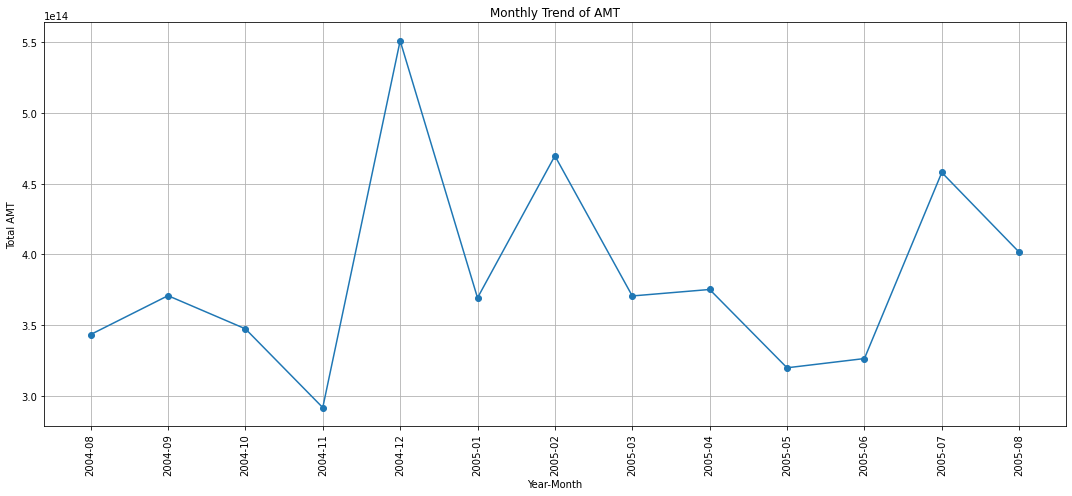

In [5]:
monthly_trend['YearMonth'] = monthly_trend['YearMonth'].astype(str)

# Plotting the trend
plt.figure(figsize=(15, 7))
plt.plot(monthly_trend['YearMonth'], monthly_trend['AMT'], marker='o')
plt.title('Monthly Trend of AMT')
plt.xlabel('Year-Month')
plt.ylabel('Total AMT')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

Here we can see that we have a peak around December 2004, which is reasonable, as Christmas and the New year is happening. However, it is suprised that we have a low AMT at Jan 2005 but a sudden increase in Feb 2005. I want to zoom in to take a look.

/var/folders/02/g7f82wh11nz_hy_qn03xhhgr0000gn/T/ipykernel_10636/2924445065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonality['Date'] = pd.to_datetime(seasonality['Date'])


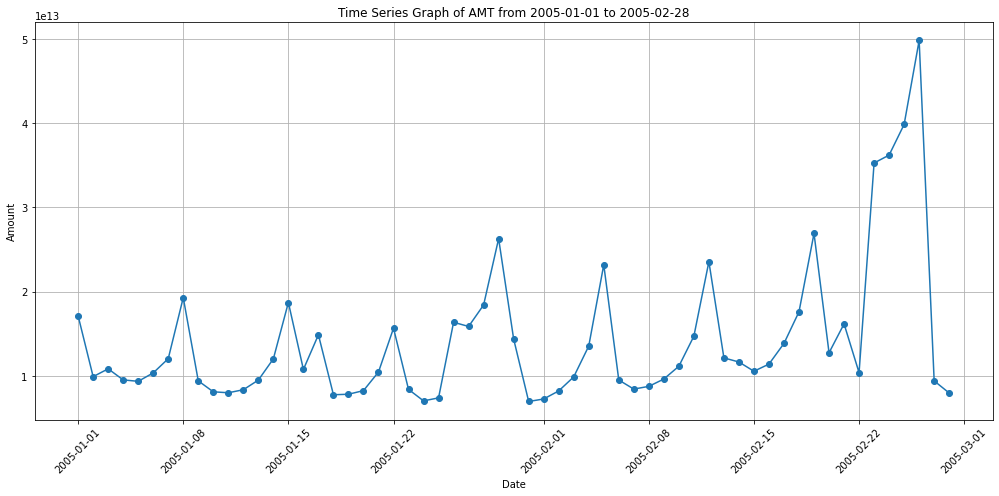

In [7]:
seasonality['Date'] = pd.to_datetime(seasonality['Date'])

# Filter data for dates between 2005-01-01 and 2005-02-28
filtered_df = seasonality[(seasonality['Date'] >= '2005-01-01') & (seasonality['Date'] <= '2005-02-28')]

# Group by 'Date' and sum the 'AMT' for each date
grouped_df = filtered_df.groupby('Date').agg({'AMT':'sum'}).reset_index()

# Plotting the time series graph
plt.figure(figsize=(14, 7))
plt.plot(grouped_df['Date'], grouped_df['AMT'], marker='o')
plt.title('Time Series Graph of AMT from 2005-01-01 to 2005-02-28')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/02/g7f82wh11nz_hy_qn03xhhgr0000gn/T/ipykernel_10636/104801411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonality['Date'] = pd.to_datetime(seasonality['Date'])


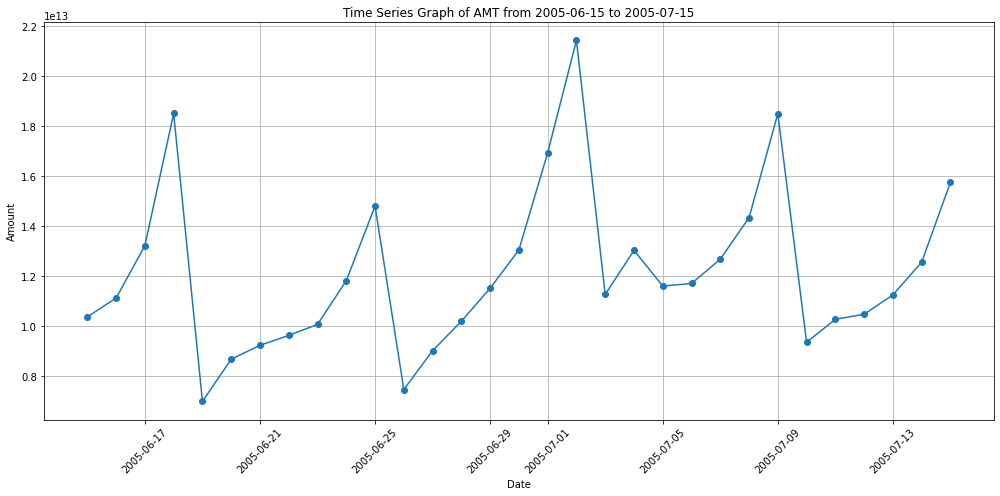

In [8]:
seasonality['Date'] = pd.to_datetime(seasonality['Date'])

# Filter data for dates between 2005-01-01 and 2005-02-28
filtered_df = seasonality[(seasonality['Date'] >= '2005-06-15') & (seasonality['Date'] <= '2005-07-15')]

# Group by 'Date' and sum the 'AMT' for each date
grouped_df = filtered_df.groupby('Date').agg({'AMT':'sum'}).reset_index()

# Plotting the time series graph
plt.figure(figsize=(14, 7))
plt.plot(grouped_df['Date'], grouped_df['AMT'], marker='o')
plt.title('Time Series Graph of AMT from 2005-06-15 to 2005-07-15')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

we can clearly see a weekly pattern here.

In [32]:
import psycopg2
# Connection parameters
host = "pg.analytics.northwestern.edu"
port = "5432"
database = "everything2023"
user = "chr0390"
password = ""
# Establish a connection to the database
conn = psycopg2.connect(
    host=host,
    port=port,
    database=database,
    user=user,
    password=password
)
cursor = conn.cursor()
sql_query = '''SELECT s."Retail", t."orgprice"
FROM group_10.trans t
JOIN group_10.skstinfo s
ON t."storeID" = s."Store"
AND t."sku" = s."SKU" -- Replace with the actual column names for SKU if they are different
LIMIT 1000000;'''
cursor.execute(sql_query)

In [33]:
data = pd.DataFrame(cursor.fetchall())
print(data)

            0      1
0       440.0  440.0
1       440.0  440.0
2       440.0  440.0
3       440.0  440.0
4       440.0  440.0
...       ...    ...
999995   13.0   26.0
999996   13.0   26.0
999997   13.0   26.0
999998   13.0   26.0
999999   13.0   26.0

[1000000 rows x 2 columns]


In [34]:
new_column_names = ['retail','orgprice']
data.columns=new_column_names

In [35]:
data

,retail,orgprice
0,440.0,440.0
1,440.0,440.0
2,440.0,440.0
3,440.0,440.0
4,440.0,440.0
...,...,...
999995,13.0,26.0
999996,13.0,26.0
999997,13.0,26.0
999998,13.0,26.0


In [36]:
count = (data['retail'] != data['orgprice']).sum()
count



675195

In [37]:
mask = data['retail'] != data['orgprice']

# Use the mask to filter the DataFrame and show only the rows with differences
different_rows = data[mask]

different_rows

,retail,orgprice
35,3.0,12.0
37,40.2,60.0
41,40.2,60.0
42,40.2,60.0
49,40.2,60.0
...,...,...
999995,13.0,26.0
999996,13.0,26.0
999997,13.0,26.0
999998,13.0,26.0


In [1]:
import psycopg2
# Connection parameters
host = "pg.analytics.northwestern.edu"
port = "5432"
database = "everything2023"
user = "chr0390"
password = ""
# Establish a connection to the database
conn = psycopg2.connect(
    host=host,
    port=port,
    database=database,
    user=user,
    password=password
)
cursor = conn.cursor()
sql_query = '''SELECT *
FROM group_10.strinfo;'''
cursor.execute(sql_query)

In [4]:
df1 = pd.DataFrame(cursor.fetchall())
print(df1)
df1.columns=['storeid','city','state','zip','unknown']
df1

        0                     1   2      3  4
0       2  ST. PETERSBURG        FL  33710  0
1       3  ST. LOUIS             MO  63126  0
2       4  LITTLE ROCK           AR  72201  0
3       7  FORT WORTH            TX  76137  0
4       9  TEMPE                 AZ  85281  0
..    ...                   ...  ..    ... ..
448  9808  GILBERT               AZ  85233  0
449  9812  METAIRIE              LA  70006  0
450  9900  LITTLE ROCK           AR  72201  0
451  9906  LITTLE ROCK           AR  72201  0
452  9909  CHEYENNE              WY  82009  1

[453 rows x 5 columns]


,storeid,city,state,zip,unknown
0,2,ST. PETERSBURG,FL,33710,0
1,3,ST. LOUIS,MO,63126,0
2,4,LITTLE ROCK,AR,72201,0
3,7,FORT WORTH,TX,76137,0
4,9,TEMPE,AZ,85281,0
...,...,...,...,...,...
448,9808,GILBERT,AZ,85233,0
449,9812,METAIRIE,LA,70006,0
450,9900,LITTLE ROCK,AR,72201,0
451,9906,LITTLE ROCK,AR,72201,0


In [5]:
import requests
from bs4 import BeautifulSoup

# URL of the page to be scraped
url = "https://uspopulation.org/florida/33710/"

# Send a GET request to the URL
response = requests.get(url)

# If the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find and print the relevant data
    # (You'll need to adjust the search criteria based on the webpage's structure)
    population_data = soup.find_all('p')
    for data in population_data:
        if "population of" in data.text:
            print(data.text)
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

33710 is a zip code in Pinellas County, Florida, which covers St. Petersburg, with a total population of 34,462 people.
The estimated population of people living in 33710 is 34,462, with a median age of 45.6.
Per capita income is the average income of a person in a given area. It is calculated by dividing the total income of 33710 by the total population of 33710.
Currently, the total population of the 33710 zip over the age of 16 is 28,921.
The total population of civilian employees that are 16 years old or older in 33710 is 17,846, with median earnings of $41,198.00.
